<h1 style='text-align: center;'>Hotel Booking Demand</h1>
<h5 style='text-align: center;'>Created by: Umam Ihsanil Ummah & Garudapaksi Yusuf</h5>

# **Contents**

- Business Problem Understanding
- Data Understanding
- Data Cleaning
- Exploratory Data Analysis
- Conclusion and Recommendation

---
# **Business Problem Understanding**

### Context

In the competitive landscape of the hospitality industry, understanding the intricate dynamics of hotel booking cancellations is paramount for optimizing revenue management and enhancing customer satisfaction. The ability to accurately predict and mitigate cancellations can significantly impact a hotel's financial performance and operational efficiency.

### Problem Statement

In the hospitality industry, booking cancellations pose significant challenges to revenue management, operational efficiency, and customer satisfaction. Despite the implementation of various customer engagement strategies and flexible booking policies, the unpredictability and frequency of cancellations continue to disrupt forecasting accuracy, inventory control, and financial stability. Additionally, hotels experience considerable financial losses due to cancellations, which manifest as lost revenue from unoccupied rooms, increased operational costs, and diminished profitability. [The global cancellation rate of hotel reservations reaches 40% on average](https://hospitalitytech.com/global-cancellation-rate-hotel-reservations-reaches-40-average).

### Objective

This analysis delves into the multifaceted factors influencing cancellation rates, leveraging advanced statistical techniques and to develop a machine learning classification model to predict hotel booking cancellations patterns and actionable insights. 
By leveraging historical booking data and various features associated with each booking record, I aim to analyze and develop a predictive model that can classify bookings into "Canceled" (1) or "Not Canceled" (0) categories. This model will help hotel managers allocate resources more effectively and optimize inventory management to reduce potential revenue loss due to cancellations.

### Analytical Approach

* **Step-1**: Perform an exploratory data analysis (EDA) to understand the characteristics of data before building a classification model.
* **Step-2**: Build a classification model to predict the probability of customers canceling their hotel booking.
* **Step-3**: Identify key factors underlie the cancelation of hotel bookings.

### Metric Evaluation

<img src='docs/Matrix.png'>

- **Type II Error (False Negative)**: When the model fails to predict a cancellation, the hotel is still required to bear the operational cost of a room upkeep. 
    * This cost amounts to [US$175 per night](https://www.fairjungle.com/e-book/b2b-hotel-price-index-worldwide-2022).

- **Type I Error (False Positive)**: When the model incorrectly identifies a booking as canceled, it may lead to overbooking situation (i.e. more reservations than available rooms at a particular time), which demands unnecessary actions by the hotel such as providing compensation to guests by offering similar or better room types.
    - This cost ranges from [US$75 - 200 per night](https://www.viqal.com/blog/hotel-room-prices-around-the-world) (see below).
    - Additionally, Hotel operational costs are also applied to this situation, which further increases the amounts to US$225 - 375 per night


In [53]:
# Calculating Hotel compensation cost
NA_major_budget, NA_major_mid, NA_major_luxury = (100 + 150) / 2, (200 + 300) / 2, 400
NA_minor_budget, NA_minor_mid, NA_minor_luxury = (50 + 80) / 2, (100 + 150) / 2, (200 + 350) / 2
NA_rural_budget, NA_rural_mid, NA_rural_luxury = (40 + 70) / 2, (80 + 130) / 2, (150 + 300) / 2

europe_major_budget, europe_major_mid, europe_major_luxury = (100 + 150) / 2, (200 + 300) / 2, 400
europe_minor_budget, europe_minor_mid, europe_minor_luxury = (60 + 90) / 2, (100 + 180) / 2, (200 + 350) / 2
europe_rural_budget, europe_rural_mid, europe_rural_luxury = (50 + 80) / 2, (90 + 150) / 2, (180 + 300) / 2

asia_major_budget, asia_major_mid, asia_major_luxury = (50 + 100) / 2, (120 + 250) / 2, 300
asia_minor_budget, asia_minor_mid, asia_minor_luxury = (20 + 40) / 2, (50 + 100) / 2, (120 + 250) / 2
asia_rural_budget, asia_rural_mid, asia_rural_luxury = (15 + 30) / 2, (40 + 80) / 2, (100 + 200) / 2

global_major_budget = (NA_major_budget + europe_major_budget + asia_major_budget) / 3
global_minor_budget = (NA_minor_budget + europe_minor_budget + asia_minor_budget) / 3
global_rural_budget = (NA_rural_budget + europe_rural_budget + asia_rural_budget) / 3
global_major_mid = (NA_major_mid + europe_major_mid + asia_major_mid) / 3
global_minor_mid = (NA_minor_mid + europe_minor_mid + asia_minor_mid) / 3
global_rural_mid = (NA_rural_mid + europe_rural_mid + asia_rural_mid) / 3
global_major_luxury = (NA_major_luxury + europe_major_luxury + asia_major_luxury) / 3
global_minor_luxury = (NA_minor_luxury + europe_minor_luxury + asia_minor_luxury) / 3
global_rural_luxury = (NA_rural_luxury + europe_rural_luxury + asia_rural_luxury) / 3

global_budget = (global_major_budget + global_minor_budget + global_rural_budget) / 3
global_mid = (global_major_mid + global_minor_mid + global_rural_mid) / 3
global_luxury = (global_major_luxury + global_minor_luxury + global_rural_luxury) / 3

compensation_budget_mid = global_mid - global_budget
compensation_mid_luxury = global_luxury - global_mid
compensation_budget_luxury = global_luxury - global_budget

print(f'''Compensation to upgrade from budget room to mid-range room: US${round(number=compensation_budget_mid)}
Compensation to upgrade from mid-range room to luxury room: US${round(number=compensation_mid_luxury)}
Compensation to upgrade from budget room to luxury room: US${round(number=compensation_budget_luxury)}''')


Compensation to upgrade from budget room to mid-range room: US$75
Compensation to upgrade from mid-range room to luxury room: US$127
Compensation to upgrade from budget room to luxury room: US$201


Hence, the focus of this analysis lies in mitigating the impact of false positives (Type I errors), as they pose a higher financial risk to the hotel. However, a consideration is also given to minimize false negatives (Type II errors) to maintain operational efficiency.

The main evaluation metric for model performance will be:
1. **Precision** score, which is useful in cases where False Positive is a higher concern than False Negative, and
2. **F-beta** (F2) score —with beta = 0.5— may also be used, since this beta ratio makes Precision score twice as important as Recall.

---
# **Data Understanding**

In [54]:
# Importing libraries for data analysis
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('max_colwidth', None)
import warnings                                                             # for disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, normaltest
import missingno as msno

In [55]:
# Loading dataset
data = pd.read_csv(filepath_or_buffer='hotel_bookings.csv')

# Showing dataset sample
display(data.sample(n=5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
24524,Resort Hotel,0,0,2016,May,22,22,2,0,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,89.0,0,1,Check-Out,2016-05-24
63404,City Hotel,1,38,2017,February,6,11,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,106.0,0,0,Canceled,2017-01-23
42504,City Hotel,1,0,2015,September,37,6,2,0,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,6.0,0,0,Canceled,2015-09-06
118843,City Hotel,0,165,2017,August,34,25,0,1,3,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,175.5,0,0,Check-Out,2017-08-26
69087,City Hotel,1,146,2017,May,21,25,0,3,2,2.0,0,BB,AUT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,198.0,0,2,Canceled,2017-01-07


### **About Dataset**

The [data](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data) is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

The dataset containing historical hotel booking records, including information such as booking dates, customer demographics, booking channels, room types, and reservation details will be utilized to build a predictive model. The dataset will be preprocessed to handle missing values, outliers, and categorical variables before training the classification model.

### **Features**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| hotel | string | Resort Hotel or City Hotel |
| lead_time | string | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year | int | Year of arrival date |
| arrival_date_month | string | Month of arrival date |
| arrival_date_week_number | int | Week number of year for arrival date |
| arrival_date_day_of_month | int | Day of arrival date |
| stays_in_weekend_nights | int | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | string | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | int | Number of adults |
| children | int | Number of children |
| babies | int | Number of babies |
| meal | string | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
| country | string | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment | string | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel | string | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest | int | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations | int | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | int | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type | string | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| assigned_room_type | string | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| booking_changes | string | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | string | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| agent | int | ID of the travel agency that made the booking |
| company | int | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| days_in_waiting_list | int | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | string | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr | string | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces | string | Number of car parking spaces required by the customer |
| total_of_special_requests | string | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status | string | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
| reservation_status_date | string | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

### **Target**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| is_canceled | int | Value indicating if the booking was canceled (1) or not (0) |

### **Data Size: Amount & Range**

In [56]:
# Define function for inspecting dataframe
def inspect_dataframe(df):
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NApercent': (df.isna().mean() * 100).round(5).tolist(),
        'Nduplicate': df.duplicated().sum(),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [57]:
# Show more in 'Sample' column
with pd.option_context('display.max_colwidth', 225):

    # Inspect data
    display(inspect_dataframe(data))

,ColumnName,Nrow,DataType,NApercent,Nduplicate,UniqueValue,Sample
0,hotel,119390,object,0.00000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,119390,int64,0.00000,31994,2,"[0, 1]"
2,lead_time,119390,int64,0.00000,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 32..."
3,arrival_date_year,119390,int64,0.00000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,119390,object,0.00000,31994,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,119390,int64,0.00000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,119390,int64,0.00000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,119390,int64,0.00000,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,119390,int64,0.00000,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,119390,int64,0.00000,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Notes:
* The dataset contains 119.390 rows and 32 columns including `is_canceled` as the target variable.
* The numerical variables (int64/float64) are `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `agent`, `company`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, and `total_of_special_requests`. While the categorical variables (object) are `hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, and `reservation_status_date`.
* Other than these, the dataset also has `is_cancelled` which will be used as the target variable. It consists of binary numbers, i.e., 0 for not canceled and 1 for canceled.
* The missing value rate are 0.41% detected in column country, 13.69% detected in column agent, and 94.31% detected in column company. And also in the `children` column there is nan value. This issue will be further checked in the following section.

In [58]:
# Generating initial descriptive statistics for dataset
display(data.describe(include=['object']).T, data.describe().T)

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Data Insights

* **Numerical Variables**
    - `is_canceled`: The range of values in the target variable is between 0 (Not Canceled) and 1 (Canceled). About 37% bookings of the total bookings are canceled.
    - `lead_time`: Most bookings are made less than 180 days or 6 months before arrival, the rest make bookings more than that (even for the next 2 years).
    - `arrival_date_year`: The bookings are made in 2015, 2016, and 2017. With the most bookings in 2016.
    -  `arrival_date_week_number`: If there are 53 weeks in a year, then bookings are done throughout the year with the most bookings in the 28th week or mid-year.
    - `arrival_date_day_of_month`: In one month, there is always an order every day with the most bookings in the 16th day or mid-month.
    - `stays_in_weekend_nights`: Most guests stay only 2 nights on weekends.
    - `stays_in_week_nights`: Most guests stay only 3 nights on weekdays.
    - `adults`: Most bookings are only for 2 adults, although some are for 55 adults.
    - `children`: The majority of bookings don't include children in the bookings, although there are some bookings that include up to 10 children.
    - `babies`: The majority of bookings don't include babies in the bookings, although there are some bookings that include up to 10 babies.
    - `is_repeated_guest`: A small percentage of bookings are made by people who have booked before.
    - `previous_cancellations`: A single customer have canceled up to 26 times.
    - `previous_bookings_not_canceled`: This indicates that most bookings are made by a new customer, so they have never canceled before.
    - `booking_changes`: Most bookings never change or are in accordance with the initial bookings.
    - `agent`: It indicates Agent ID that made the bookings with considerable variability.
    - `company`: It indicates the company/entity ID that made the bookings or responsible for paying the bookings with considerable variability.
    - `days_in_waiting_list`: While most bookings spend no time on the waiting list, some have waited for as many as 391 days with considerable variability.
    -  `adr`: Most bookings daily rate ranged between USD -6.38 to USD 5,400. I assume that the negative rate is due to a typo.
    - `required_car_parking_spaces`: Most bookings don't require parking spaces but a few require up to 8 spaces.
    - `total_of_special_requests`: Typically, bookings have few special requests, but some have as many as 5.

* **Categorical Variables**
    - `hotel`: Majority of bookings are for City Hotel with 79K+ bookings.
    - `arrival_date_month`: Most bookings are done for August which is the mid-year with 13K+ bookings.
    - `meal`: Majority of bookings choose BB (Bed & Breakfast) as meal package with 92K+ booking.
    - `country`: The majority of bookings originate from Portugal (PRT), accounting for 34K+ out of 83K+, showing diversity in booking origins.
    - `market_segment`: The most common market segment is Online Travel Agent (Online TA) with 39.4K bookings, indicating the primary channel for bookings.
    - `distribution_channel`: The most distributin channel is TA/TO	with 97K+ bookings.
    - `reserved_room_type`: The most frequently reserved room type is type A, with 85K+ bookings, indicating popularity or availability of this room type.
    - `assigned_room_type`: The most frequently assigned room type is type A, with 74K+ bookings.
    - `deposit_type`: Most bookings are made without deposits (No Deposit), comprising 104K out of 119K bookings, suggesting a prevalent payment method.
    - `customer_type`: The majority of customers are transient, with 89K transient bookings, indicating a high proportion of short-stay guests.
    - `reservation_status`: The majority status of reservation is Check Out, indicates that majority of bookings are not canceled.
    - `reservation_status_date`: Most bookings are ended on 2015-10-21 (whether it is canceled or not)

| Variable | Insights |
| --- | --- |
| hotel | - |
| is_canceled | Will be the target of our prediction |
| lead_time | Outlier: `737.0` is way above the mean, standard deviation, and 75% value of the data |
| arrival_date_year | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_month | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_week_number | - |
| arrival_date_day_of_month | - |
| stays_in_weekend_nights | Outlier: `53.0` is way above the mean, standard deviation, and 75% value of the data |
| stays_in_week_nights | Outlier: `31.0` is way above the mean, standard deviation, and 75% value of the data |
| adults | Outlier: `55.0` is way above the mean, standard deviation, and 75% value of the data |
| children | Invalid data type: `int` instead of `float` based on data description |
|  | Missing value: `nan`, in a very small amount (4 missing values/0.003% of total data)  |
|  | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| babies | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| meal | Invalid value: `Undefined` —may be recategorized as `SC` based on data description |
| country | High cardinality: object data type with `177` unique value |
|  | Missing value: `nan`, in a very small amount (488 missing values/0.41% of total data) |
| market_segment | - |
| distribution_channel | - |
| is_repeated_guest | Invalid data type: `bool` instead of `int` based on data description |
| previous_cancellations | Outlier: `26.0` is way above the mean, standard deviation, and 75% value of the data |
| previous_bookings_not_canceled | Outlier: `72.0` is way above the mean, standard deviation, and 75% value of the data |
| reserved_room_type | - |
| assigned_room_type | - |
| booking_changes | - |
| deposit_type | - |
| agent | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a significant amount (16340 missing values/13.69% of total data) |
|  | High cardinality: object data type with `333` unique value |
| company | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a very large amount (112593 missing values/94.31% of total data) |
|  | High cardinality: object data type with `352` unique value |
| days_in_waiting_list | Outlier: `391.0` is way above the mean, standard deviation, and 75% value of the data |
| customer_type | - |
| adr | Outlier: `-6.38` and `5400.0` is way beyond the mean, standard deviation, and 25% or 75% value of the data, respectively |
| required_car_parking_spaces | Outlier: `8.0` is way above the mean, standard deviation, and 75% value of the data|
| total_of_special_requests | Outlier: `5.0` is way above the mean, standard deviation, and 75% value of the data|
| reservation_status | - |
| reservation_status_date | High cardinality: object data type with `926` unique value |

Notes:

* Dataset rows or each data point may represent booking information inputted by a person/guest/client through several distribution (booking) channels, namely `Direct` (personal/in-person booking), `Corporate` (i.e. through Hotel reception desk), `TA/TO` (using Travel Agency or Tour Operator services), and `GDS` (Global Distribution System or computerised network system operated by Hotel that enables transactions between travel industry service providers)
* `arrival_date` columns may be inputted by clients in their early phase of booking process (i.e. before they cancel the booking)
* `PMS` stands for Property Management System; computerized system under hospitality accommodation management which facilitates a hotel/resort's reservation management and administrative tasks.
* `Transient` business consists of corporate and leisure guests looking for short and last-minute hotel stays.
* If a hotel has $50,000 in room revenue and 500 rooms sold, the `adr` would be $100 ($50,000/500).

---

# **Data Cleaning**

In [59]:
# Making a copy of dataset
df = data.copy()

Notes:

* Copying dataset is done to avoid chained indexing.
* Let's check whether the dataset has duplicate or not

## Duplicated Data

In [60]:
# Detecting any duplicated data
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


Since we want to make the data as machine learning modelling, we need to have dataset that having no duplicates. So we can drop the duplicate data.

In [61]:
# Dropping duplicated data
df = df.drop_duplicates(keep='first') # Keeping first instances of duplicated data

# Verifying process
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Missing Value

### Graphical Analysis

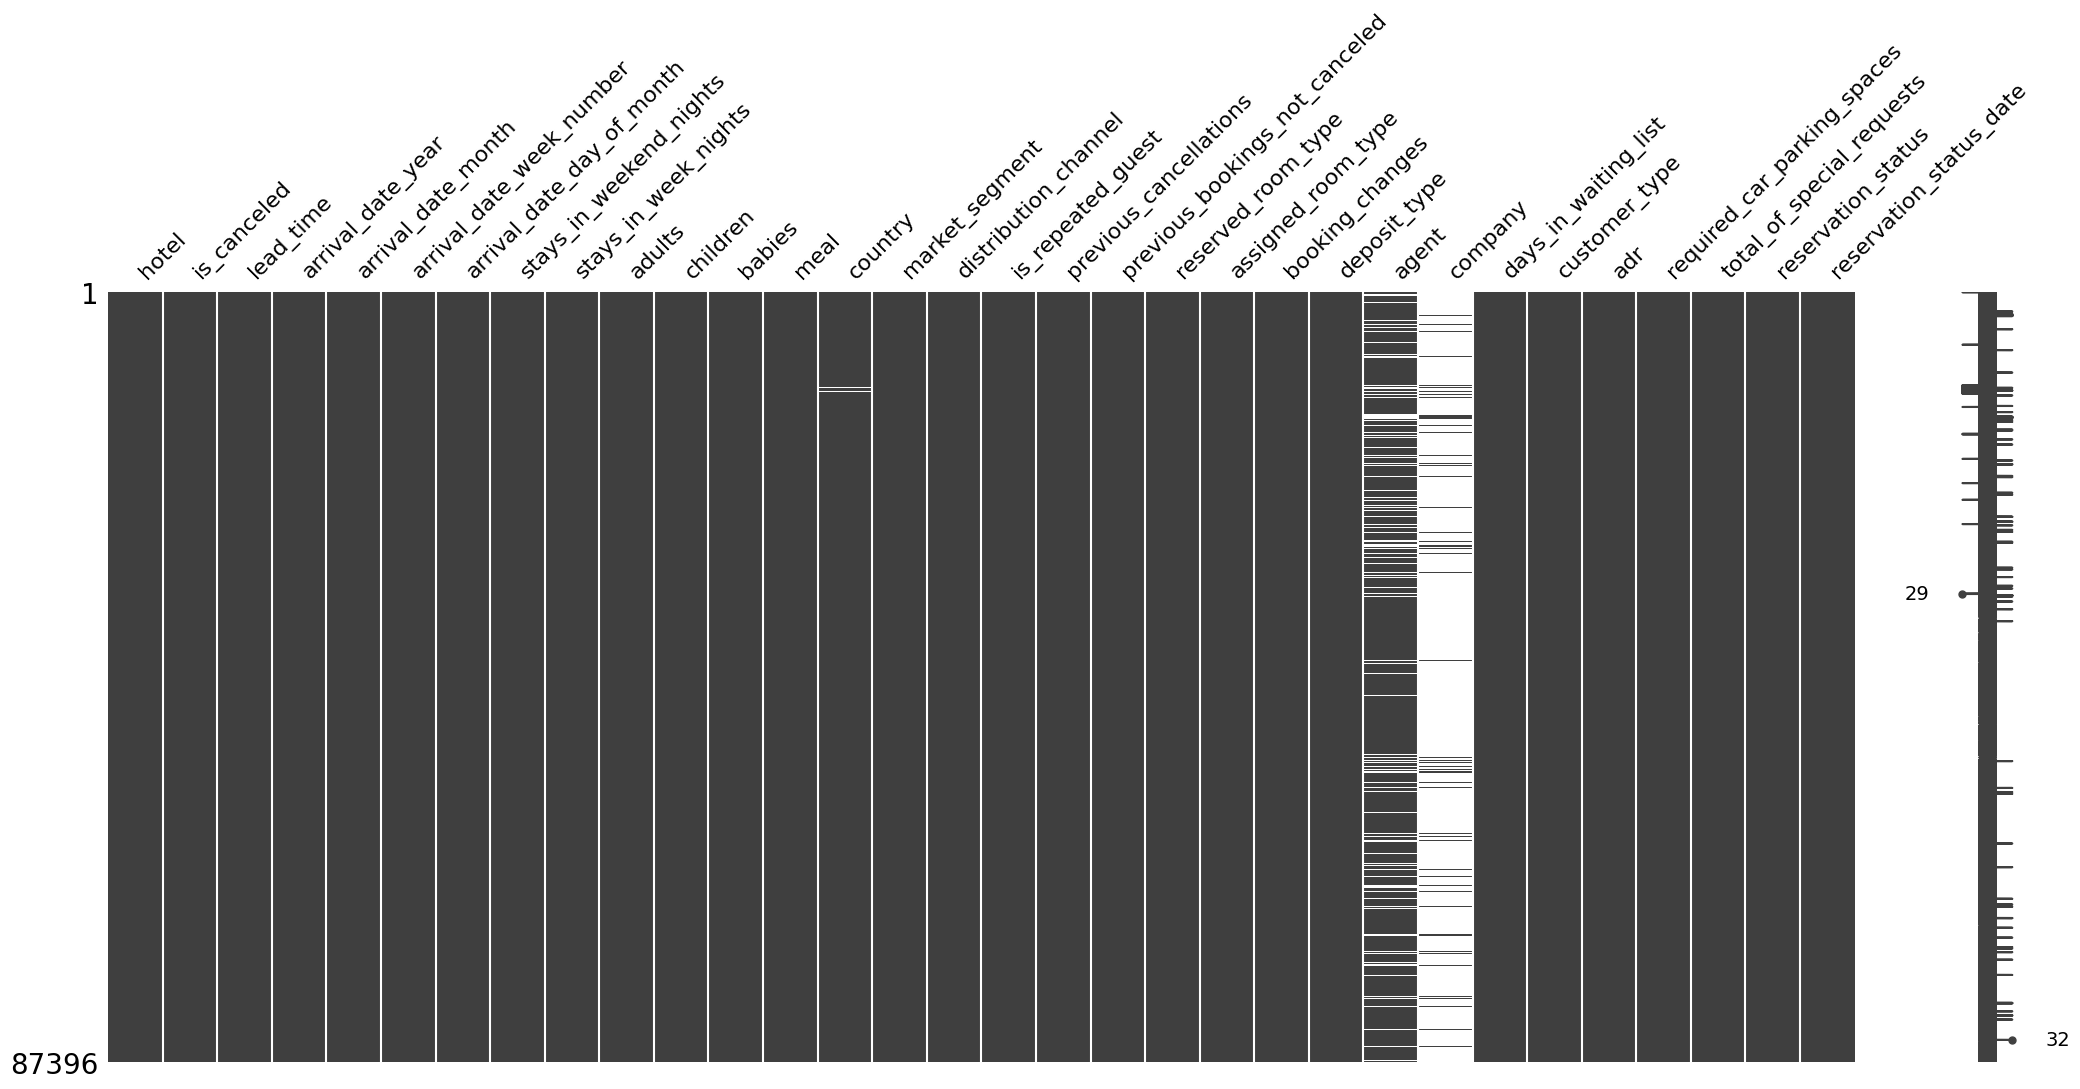

In [62]:
# Plotting bar chart of nullity in dataset
msno.matrix(df=df)

# Displaying chart
plt.show()

Notes:
* `hotel`, `is_canceled`, `lead_time`, and other columns with similar visualizations are completely populated with values.
* `country` only has a small amount of missing values (so does `children` actually, but it is not shown well in this visualization).
* `agent` have spotty chart/visualization, indicating randomness in missing values.
* `company` is dominated with blank chart, with no discernible pattern in missing value (a bit of data points are randomly filled with values).

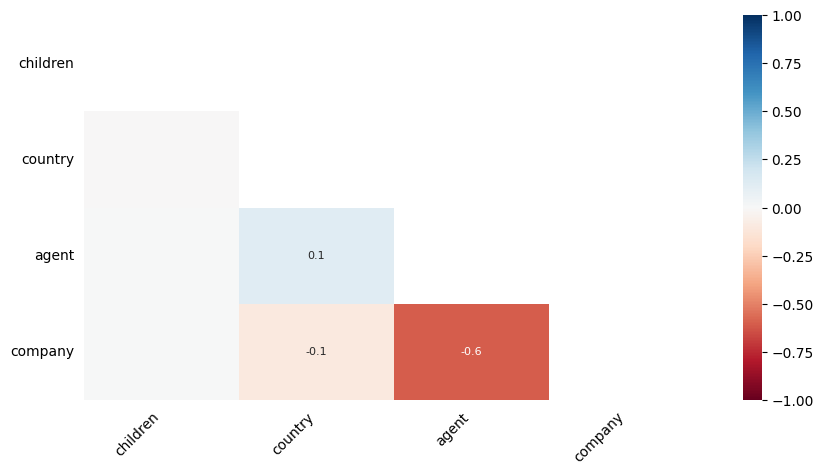

In [63]:
# Plotting heatmap of nullity in dataset
msno.heatmap(df=df, 
                  figsize=(10, 5), # Applying parameter for smaller figure size
                  fontsize=10) # Applying parameter for smaller font size

# Displaying chart
plt.show()

Notes:

* Nullity correlation ranges from -1 (if one variable appears, the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears, the other definitely also does).
* Correlations are computed using `pandas.corr()` default/standard method (Pearson's).
* Based on this correlation, data points which contain values in `company` are mostly incomplete (have missing value) in `agent`, and so otherwise.

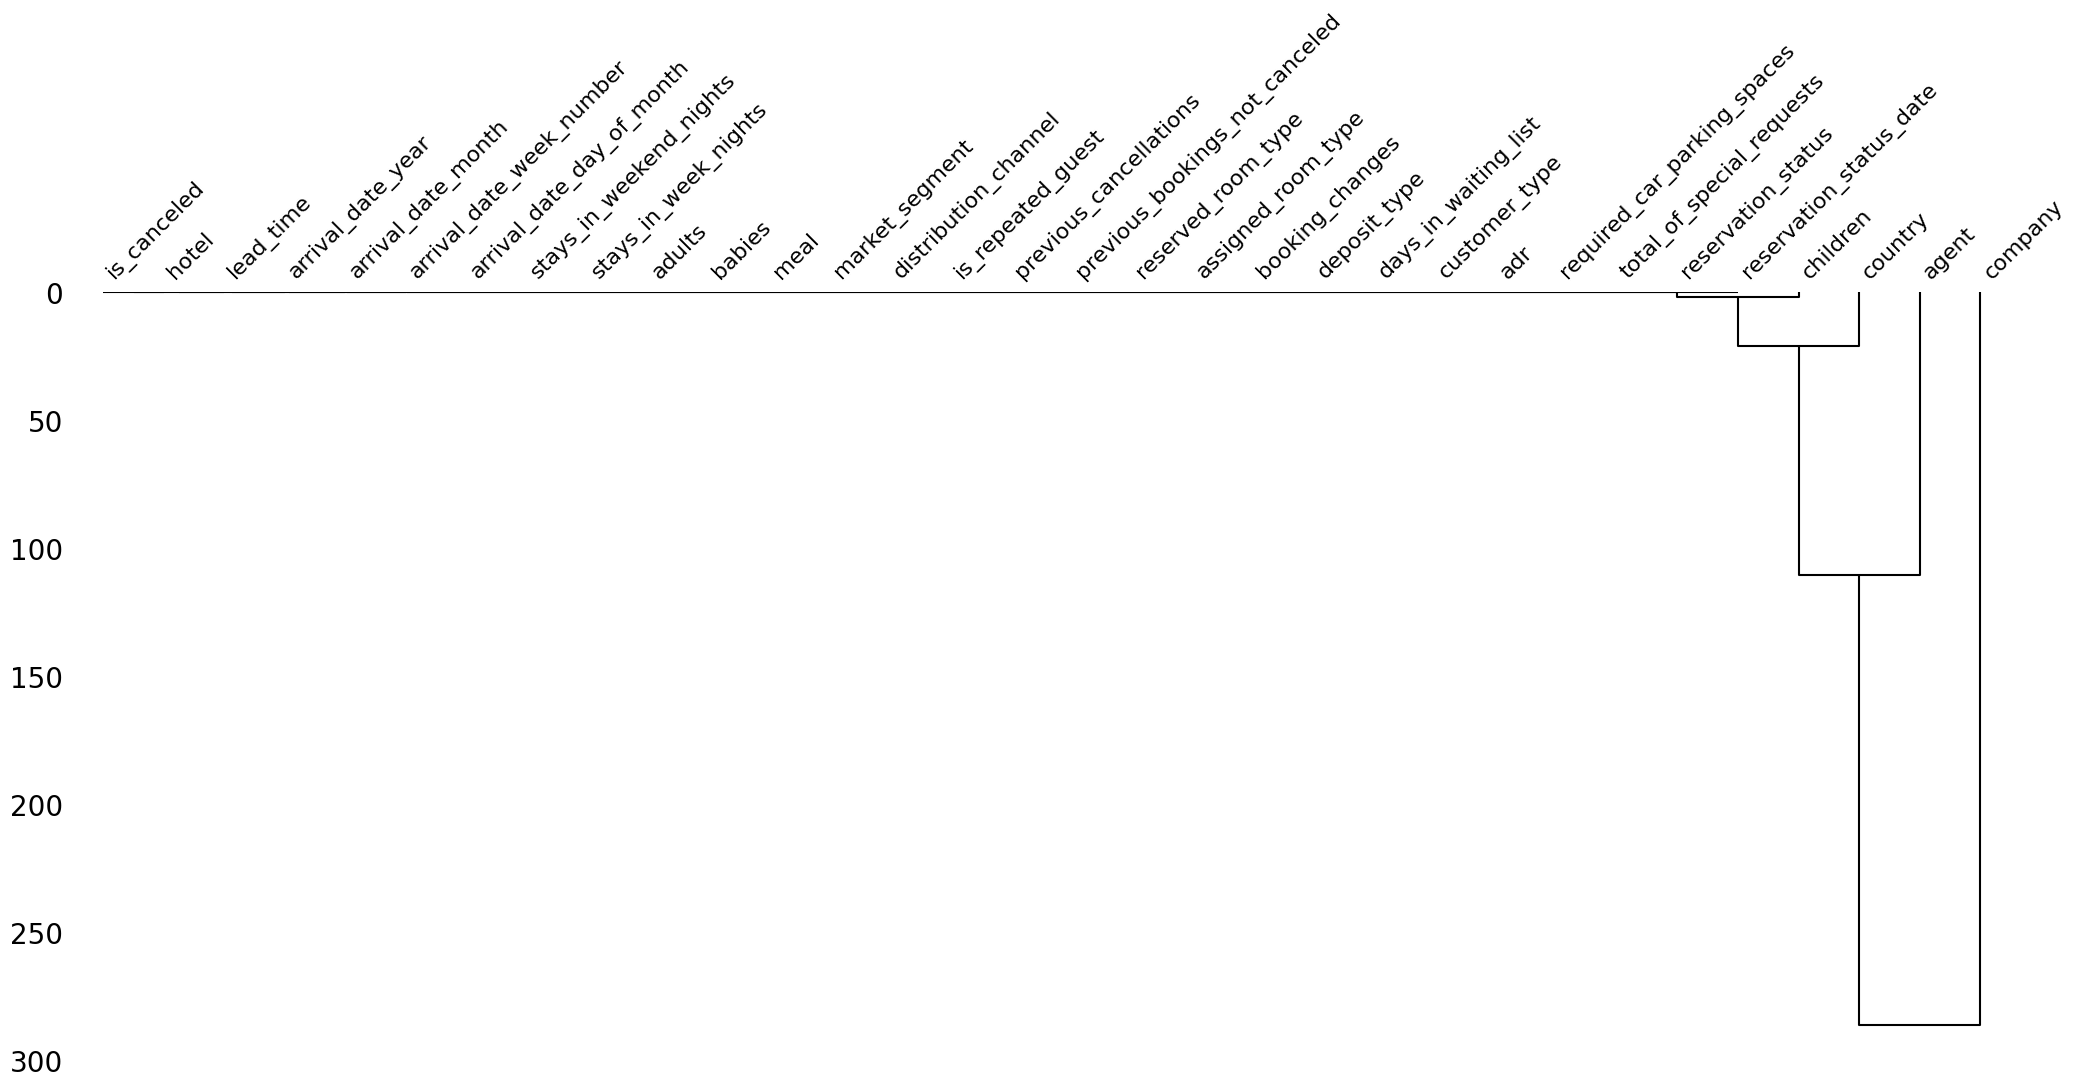

In [64]:
# Plotting dendrogram of nullity in dataset
msno.dendrogram(df=df)

# Displaying chart
plt.show()

Notes:
* Cluster leaves (variables) which linked together at a distance of zero (as shown in y-axis) fully predict one another's presence —one variable might always be empty when another is filled, or they might always both be filled or both empty.
* In this chart, the dendrogram glues together the variables that are present in every data point (i.e. from `is_canceled` to `total_of_special_requests`)
* Cluster leaves which split close to zero (`reservation_status` and `children`) predict one another very well, but still imperfectly.
* In contrast with this, `agent` and `company` are not linked directly, but through several steps of splitting in the dendrogram. This indicates that values (either observed or missing) in these columns are not exactly correlated with each other, but through combinations with values in `reservation_status`, `children`, and `country`.

### Tabular Analysis

In [65]:
# Filtering data with missing value in 'children'
with pd.option_context('display.max_columns', None): # Setting maximum number of column displayed to unlimited
    display(df[df.children.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Notes:

* Data with missing value in `children` has similar value in `hotel`, `is_canceled`, `arrival_date_year`, etc. but also different value in `lead_time`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, etc. In other words, those missing data points are a random subset of the data.
* No available information (i.e. other variables in the dataset or information from data description) regarding the missing value in `children`, and
* No known mechanism or reason why the missing values in `children` are introduced in the dataset.

Therefore, based on previous graphical & tabular analyses, missing value in `children` **may be regarded as Missing Completely At Random (MCAR)**. If values for observations are missing completely at random, then **disregarding those cases would not bias the inferences made through the machine learning algorithm or model; especially when the number/percentage of missing value is relatively small**.

In [66]:
# Filtering data with missing value in 'country'
with pd.option_context('display.max_columns', None):
    display(df[df.country.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


Notes:

Similar with above explanation, data with missing value in `country` are even more differing with each other, which **may also be regarded as MCAR**.


In [67]:
df.dropna(subset=['children'], inplace=True)
df.dropna(subset=['country'], inplace=True)

In [68]:
# Filtering data without missing value in 'agent' and 'company'
df[(df.agent.notna()) & df.company.notna()][['agent', 'company']]

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
...,...,...
112499,9.0,478.0
113046,290.0,148.0
113082,290.0,148.0
113627,14.0,229.0


Notes:

* Values in `agent` and `company` are not exactly the same or matched with each other.
    * This indicates that the travel agency and the company/entity that made the booking are not the same for each data point.
    * Hence, it would not be appropriate/suitable to impute missing value in `agent` based on available value in `company` per data point, and vice versa.
* Based on previous findings, `agent` and `company` also have:
    * Significant amount of missing values: `13.69%` and `94.31%`, respectively.
    * High cardinality: `333` and `352` unique values, and
    * Moderate to high correlation with other variables in dataset; especially correlated with target `is_canceled`.

Therefore, these variables will not be included as features in the prediction modeling, and **missing values in these columns will not be handled**.

In [69]:
df = df.drop(columns= ['agent', 'company'])

## Invalid Data

In [70]:
# Casting variables to their appropriate data type
df = df.astype(dtype={'children': 'Int64'})

# Replacing values with other appropriate values
df.replace(to_replace={'meal': {'Undefined': 'SC'},
                       'is_canceled': {0: 'Not Canceled',
                                       1: 'Canceled'},
                       'is_repeated_guest': {0: 'Not Repeated',
                                             1: 'Repeated'}}, inplace=True)

# Verifying process
display(df[['children']].dtypes)
display(df.meal.unique())

children    Int64
dtype: object

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

## Data Merging

In [71]:
# Merging 'stays_in_week_nights' and 'stays_in_weekend_nights'
df.insert(loc=df.columns.get_loc(key='stays_in_week_nights') + 1, 
          column='total_stays_in_nights', 
          value=df.stays_in_week_nights + df.stays_in_weekend_nights)

# Merging 'adults', 'children', and 'babies'
df.insert(loc=df.columns.get_loc(key='babies') + 1, 
          column='total_guests', 
          value=df.adults + df.children + df.babies)

with pd.option_context('display.max_column', None):
    display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stays_in_nights,adults,children,babies,total_guests,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Direct,Direct,Not Repeated,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Corporate,Corporate,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,2,0,0,2,BB,GBR,Online TA,TA/TO,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Exploratory Data Analysis**

### **1. Data Distribution**

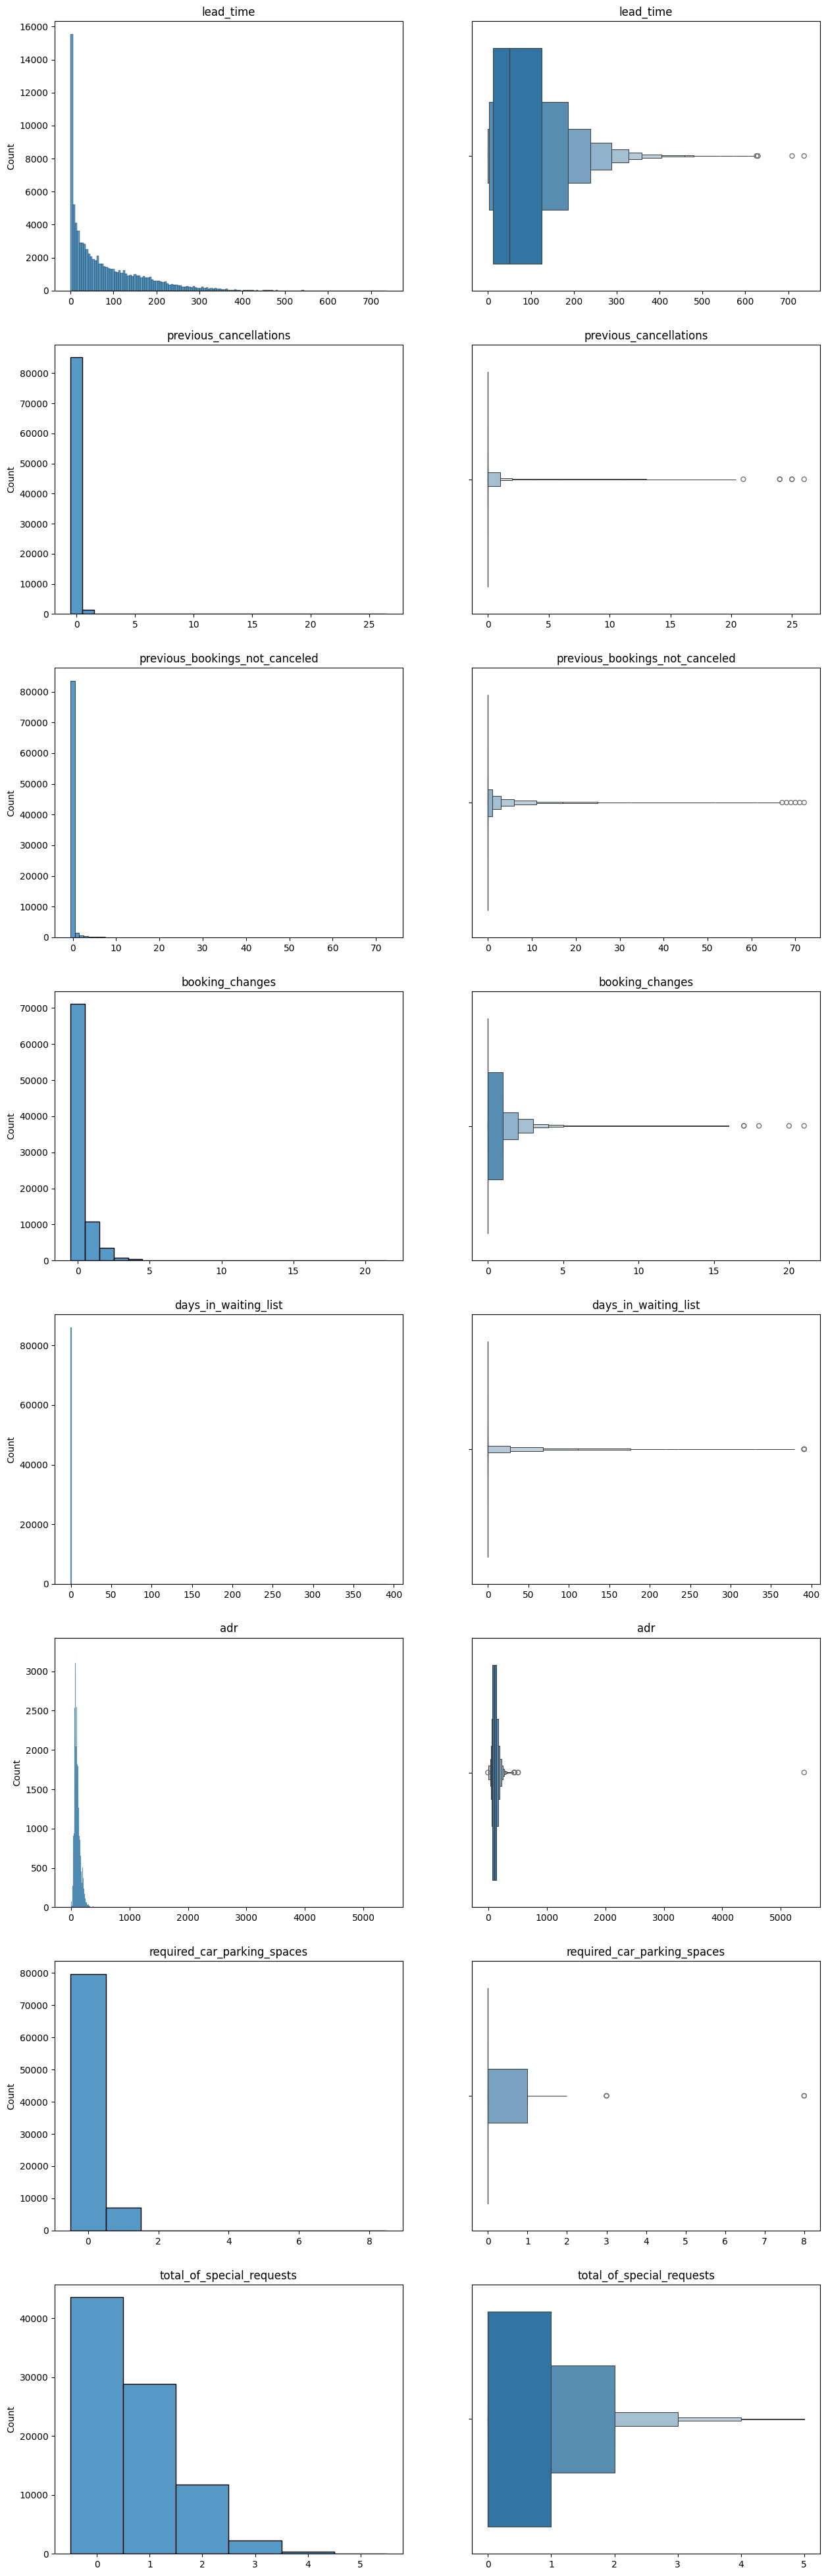

In [72]:
# Plotting numerical variables
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 50))

sns.histplot(data=df, x='lead_time', ax=axs[0, 0]).set(xlabel=None, title='lead_time')
sns.boxenplot(data=df, x='lead_time', ax=axs[0, 1]).set(xlabel=None, title='lead_time')

sns.histplot(data=df, x='previous_cancellations', discrete=True, ax=axs[1, 0]).set(xlabel=None, title='previous_cancellations')
sns.boxenplot(data=df, x='previous_cancellations', ax=axs[1, 1]).set(xlabel=None, title='previous_cancellations')

sns.histplot(data=df, x='previous_bookings_not_canceled', discrete=True, ax=axs[2, 0]).set(xlabel=None, title='previous_bookings_not_canceled')
sns.boxenplot(data=df, x='previous_bookings_not_canceled', ax=axs[2, 1]).set(xlabel=None, title='previous_bookings_not_canceled')

sns.histplot(data=df, x='booking_changes', discrete=True, ax=axs[3, 0]).set(xlabel=None, title='booking_changes')
sns.boxenplot(data=df, x='booking_changes', ax=axs[3, 1]).set(xlabel=None, title='booking_changes')

sns.histplot(data=df, x='days_in_waiting_list', discrete=True, ax=axs[4, 0]).set(xlabel=None, title='days_in_waiting_list')
sns.boxenplot(data=df, x='days_in_waiting_list', ax=axs[4, 1]).set(xlabel=None, title='days_in_waiting_list')

sns.histplot(data=df, x='adr', ax=axs[5, 0]).set(xlabel=None, title='adr')
sns.boxenplot(data=df, x='adr', ax=axs[5, 1]).set(xlabel=None, title='adr')

sns.histplot(data=df, x='required_car_parking_spaces', discrete=True, ax=axs[6, 0]).set(xlabel=None, title='required_car_parking_spaces')
sns.boxenplot(data=df, x='required_car_parking_spaces', ax=axs[6, 1]).set(xlabel=None, title='required_car_parking_spaces')

sns.histplot(data=df, x='total_of_special_requests', discrete=True, ax=axs[7, 0]).set(xlabel=None, title='total_of_special_requests')
sns.boxenplot(data=df, x='total_of_special_requests', ax=axs[7, 1]).set(xlabel=None, title='total_of_special_requests')

plt.show()

In [73]:
# Listing numerical variables
numeric_vars = df.select_dtypes(include='number')

# Showing statistic values of numerical variables
pd.DataFrame(data={'numeric_variables': numeric_vars.columns,
                   'skewness': numeric_vars.apply(func=lambda var: var.skew()).values,
                   'kurtosis': numeric_vars.apply(func=lambda var: var.kurt()).values,
                   'kstest_statistics': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm') # Comparing numerical vars against normal distribution
                                                                              [0]).values,
                   'kstest_pvalues': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm')[1]).values,
                   'normaltest_statistics': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[0]).values,
                   'normaltest_pvalues': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[1]).values})

,numeric_variables,skewness,kurtosis,kstest_statistics,kstest_pvalues,normaltest_statistics,normaltest_pvalues
0,lead_time,1.428345,2.117006,0.873592,0.0,21257.670890,0.0
1,arrival_date_year,-0.299658,-0.883543,1.000000,0.0,12284.342754,0.0
2,arrival_date_week_number,0.022405,-0.948483,0.977958,0.0,15258.793672,0.0
3,arrival_date_day_of_month,-0.000053,-1.196362,0.945584,0.0,74510.210042,0.0
4,stays_in_weekend_nights,1.312358,6.230988,0.500000,0.0,26360.994987,0.0
5,stays_in_week_nights,2.511225,17.781591,0.770848,0.0,52868.833095,0.0
6,total_stays_in_nights,2.877535,21.055421,0.833960,0.0,59139.042103,0.0
7,adults,20.022263,1359.420917,0.836974,0.0,193525.089128,0.0
8,children,3.455062,12.888282,0.500000,0.0,61916.669653,0.0
9,babies,21.184554,1210.383601,0.500000,0.0,197390.031121,0.0


Notes:
* Skewness with positive value indicates variable with positive distribution or right-skewed, and otherwise for negative value.
* Kurtosis value above 3 —using Fisher's definition of kurtosis— indicates variable with more extreme outliers than normal distribution (leptokurtic), and otherwise for below 3 (mesokurtic).
* P-value of normality test used (Kolmogorov-Smirnov and D'Agostino-Pearson, respectively) below critical statistical significance (0.05) indicates that we may reject the null hypotheses and assumes that the variable is not normally distributed.

Based on graphical & statistical summaries above, it may be concluded that **all numerical variables in dataset are not normally distributed (non-parametric)**.

### **2. Customer Demography**

#### **Percentage of Hotel Type**

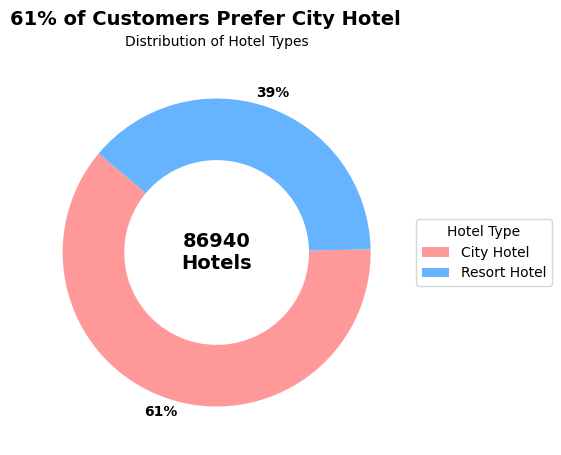

In [74]:
hotel_counts = df['hotel'].value_counts()

colors = ['#ff9999','#66b3ff']

fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    hotel_counts,
    labels=None, 
    autopct='%1.0f%%',
    pctdistance=1.1,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)


total_hotels = hotel_counts.sum()
ax.text(0, 0, f'{total_hotels}\nHotels', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

ax.legend(wedges, hotel_counts.index, title="Hotel Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.suptitle('61% of Customers Prefer City Hotel', fontsize=14, weight='bold')
plt.title('Distribution of Hotel Types', fontsize=10, style='normal', pad=10)

plt.show()

**Note**

61% of 86940 customers, which means 53033 customers prefer city hotels for their stay. This makes sense because City Hotel is  strategically located in the city center or business area, close to important places such as offices, shopping centers, and city attractions. This means customers prefer to have a faster and more efficient experience, with a focus on comfort and ease of access to city amenities.

#### **Country Origin**

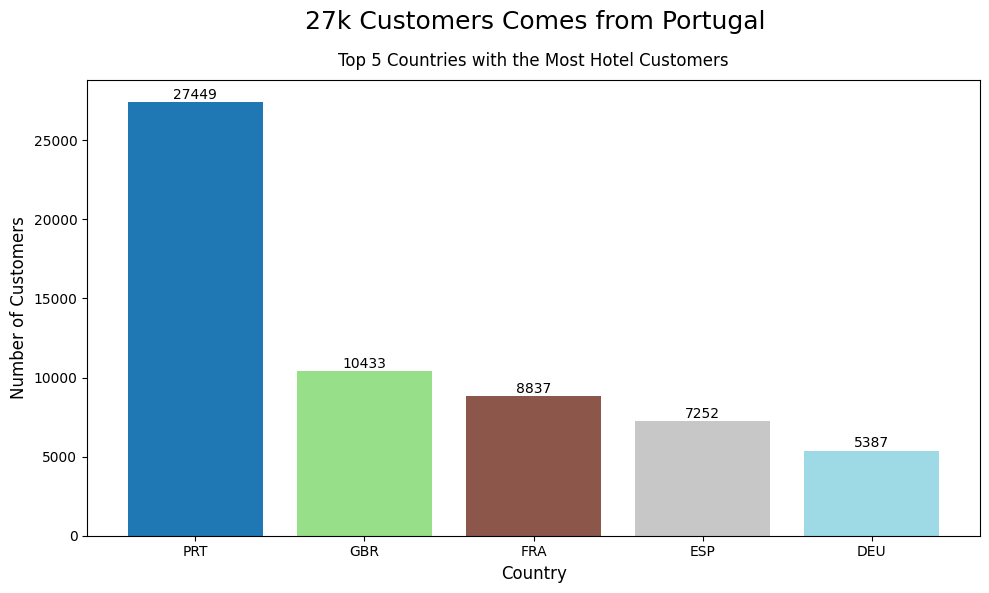

In [75]:
country_counts = df['country'].value_counts()

top_countries = country_counts.nlargest(5)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_countries)))
bars = plt.bar(top_countries.index, top_countries.values, color=colors)

plt.title('Top 5 Countries with the Most Hotel Customers', fontsize=12, pad=10, loc='center')
plt.suptitle('27k Customers Comes from Portugal', fontsize=18, y=0.98, x= 0.54)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

**Note:**<br>
- Portugal is the country with the most customer with 27449 customers.
- In second and third place are Great Britain with 10443 customers and France with 8837 customers.

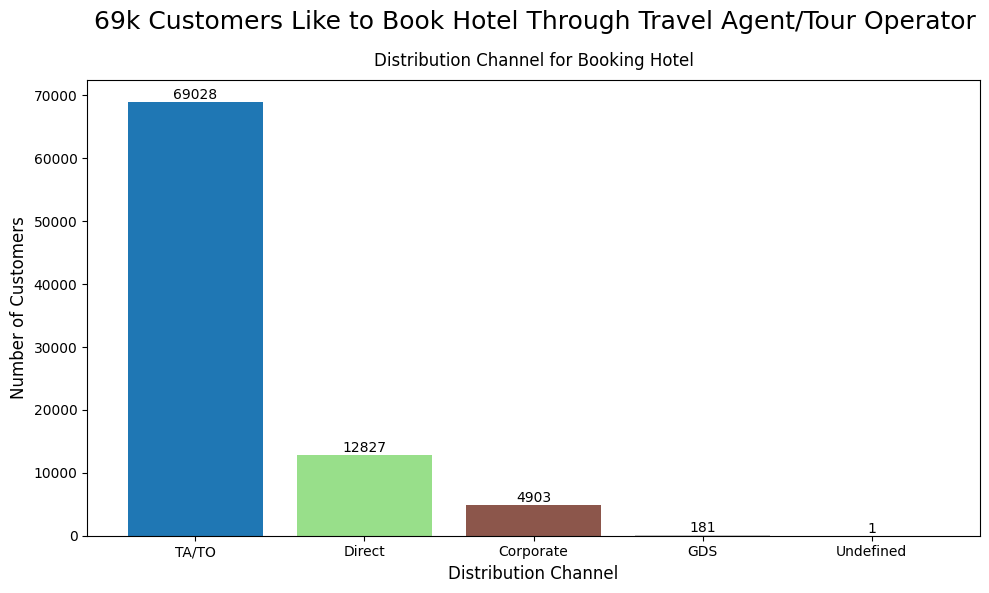

In [76]:
channel_count = df['distribution_channel'].value_counts()

top_channel = channel_count.nlargest(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_channel)))
bars = plt.bar(top_channel.index, top_channel.values, color=colors)

plt.title('Distribution Channel for Booking Hotel', fontsize=12, pad=10, loc='center')
plt.suptitle('69k Customers Like to Book Hotel Through Travel Agent/Tour Operator', fontsize=18, y=0.98, x= 0.54)

plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

**Note:**<r>

TA/TO being the customer's choice for booking hotels with 69028 bookings, This shows that customers prefer the practicality of booking hotels over other channels such as Direct where they have to come or contact the hotel directly to book. This also makes sense because through TA/TO customers can directly see the hotel price per night and the availability of the hotel, even though we know that there is an administration fee from TA/TO like Klook, Agoda, and or Airbnb.

#### **Number of Customer**

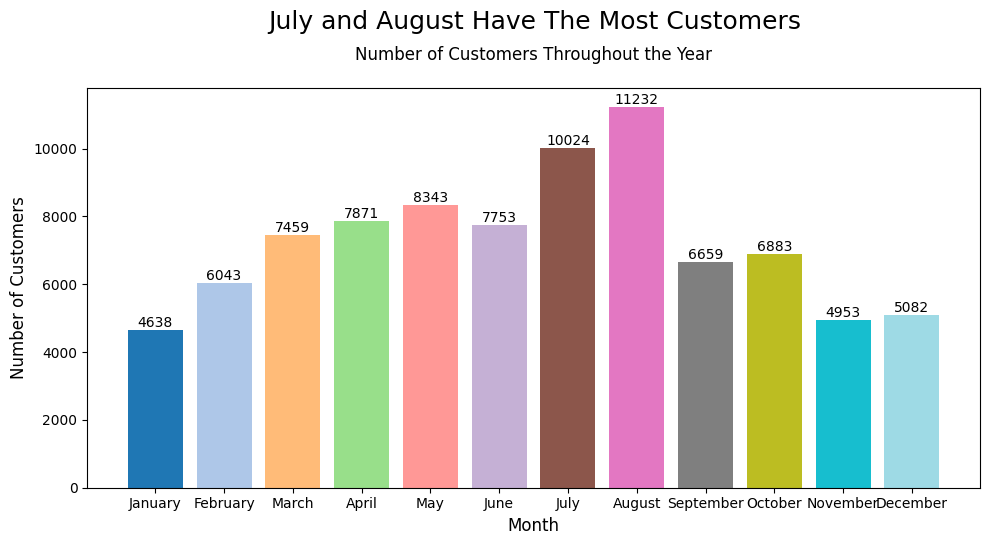

In [77]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

month_count = df['arrival_date_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(months_order)))
bars = plt.bar(month_count.index, month_count.values, color=colors)

plt.title('Number of Customers Throughout the Year', fontsize=12, pad=20, loc='center')
plt.suptitle('July and August Have The Most Customers', fontsize=18, y=0.9, x=0.54)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()

August and July are the customer's favorite months for vacation. This makes sense because it is still in school holidays and the transition from summer to autumn so the temperature is not too high. After August, as winter approaches, the number of customers decreases. Colder temperature can also affect this. Hotel revenue increases when it finishes winter and decreases when it enters winter.

#### **Price**

C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\2308512186.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['adr']].median()
C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\2308512186.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['adr']].median()


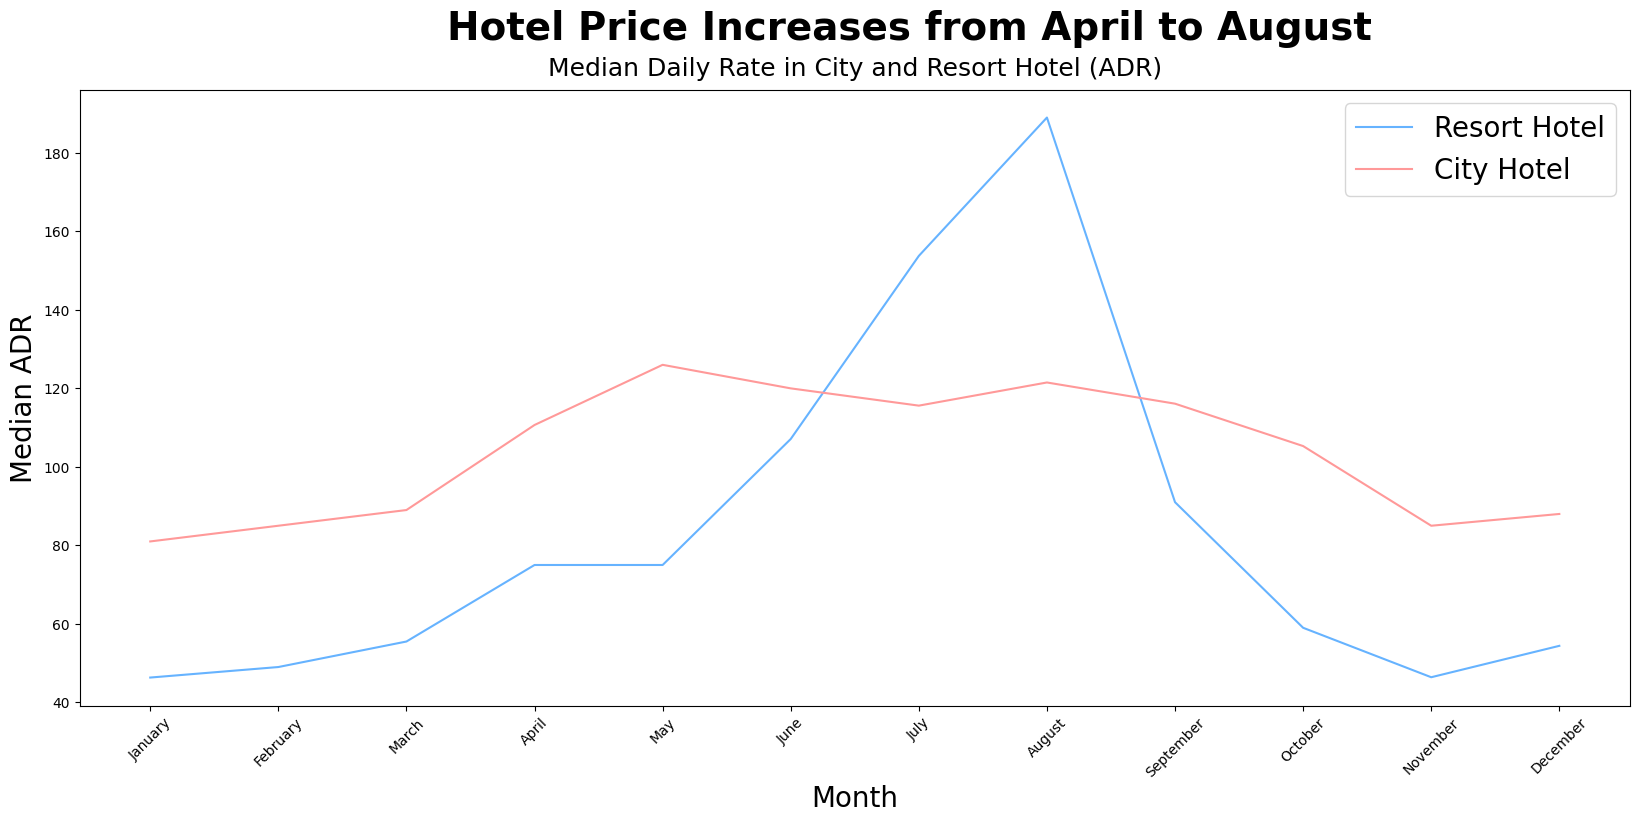

In [78]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['adr']].median()
city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['adr']].median()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

resort_hotel_grouped.index = pd.Categorical(resort_hotel_grouped.index, categories=month_order, ordered=True)
city_hotel_grouped.index = pd.Categorical(city_hotel_grouped.index, categories=month_order, ordered=True)

resort_hotel_grouped = resort_hotel_grouped.sort_index()
city_hotel_grouped = city_hotel_grouped.sort_index()

colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(20, 8))
plt.title('Median Daily Rate in City and Resort Hotel (ADR)', fontsize=18, pad=10, loc='center')
plt.suptitle('Hotel Price Increases from April to August', fontsize=28, y=0.98, x= 0.54, weight = 'bold')
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped['adr'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_grouped.index, city_hotel_grouped['adr'], label='City Hotel', color=colors[1])
plt.legend(fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Median ADR', fontsize=20)
plt.xticks(rotation=45)
plt.show()

City Hotel had a fairly steady increase between April and August. While the increase is quite rapid in Resort Hotels, this is in accordance with the economic principle of Supply and Demand, where people start vacationing in the spring to peak in the summer.

### **3. Cancellation Percentage**

#### **Booking Status**

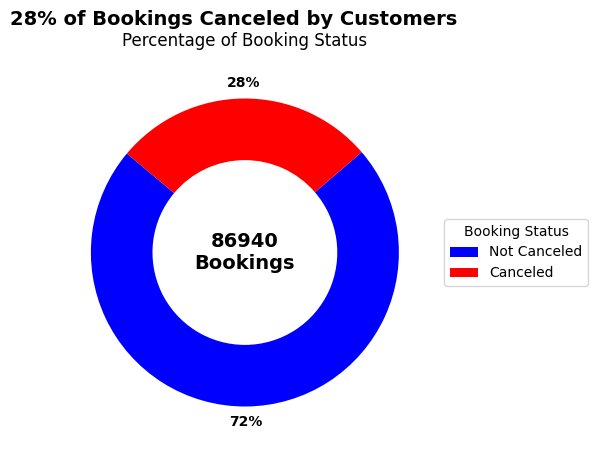

In [79]:
booking_counts = df['is_canceled'].value_counts()

colors = ['blue','red']

fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    booking_counts,
    labels=None,
    autopct='%1.0f%%',
    pctdistance=1.1,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

total_booking = booking_counts.sum()
ax.text(0, 0, f'{total_booking}\nBookings', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

ax.legend(wedges, booking_counts.index, title="Booking Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), )

plt.suptitle('28% of Bookings Canceled by Customers', fontsize=14, weight='bold')
plt.title('Percentage of Booking Status', fontsize=12, style='normal', pad=10)

plt.show()

**Note:**<br>
The ratio of canceled bookings (28%) can be used as an indicator of hotel performance. Hotels with low cancellation rates may have better services and a better reputation in the eyes of customers. This is what we will analyze further.

#### **Booking Status of Each Hotel**

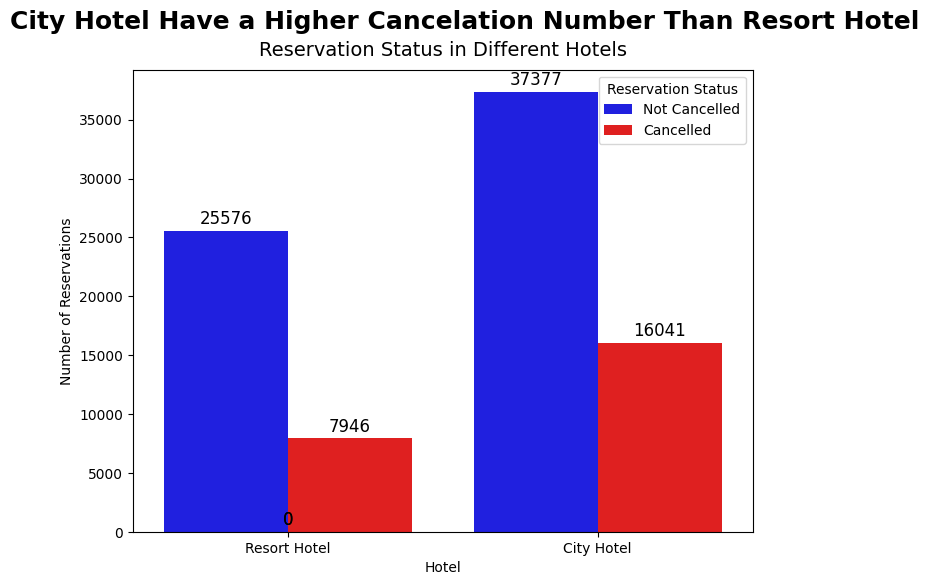

In [80]:
plt.figure(figsize=(8, 6))

palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Reservation Status in Different Hotels', fontsize=14, pad=10, loc='center')
plt.suptitle('City Hotel Have a Higher Cancelation Number Than Resort Hotel', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

**Note:**<br>
Although City Hotel has more customers than Resort Hotel, the number of cancelations is also high. With easy access to the city center and even adequate public facilities, it turns out that it does not prevent City hotels from canceling orders compared to Resort Hotels where the customer's purpose of staying is to vacation.

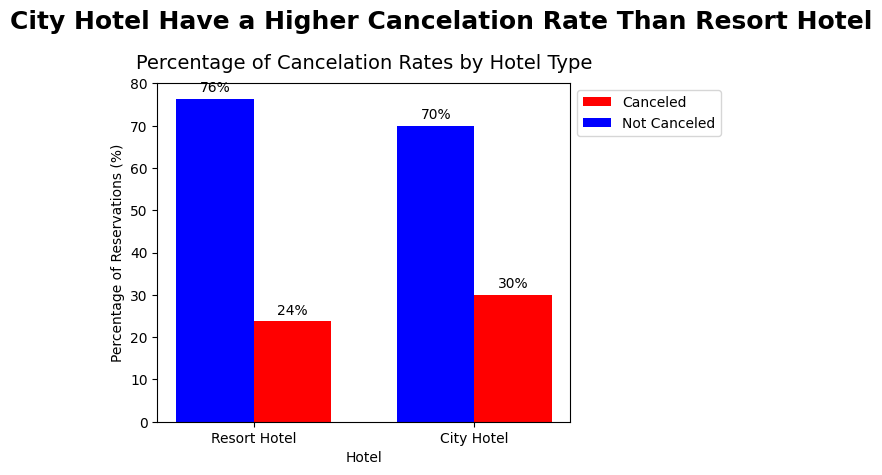

In [81]:
cancel_counts = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

new_order = ['Resort Hotel','City Hotel']
cancel_counts = cancel_counts.loc[new_order]

total_counts = cancel_counts.sum(axis=1)
cancelled_percent = (cancel_counts['Canceled'] / total_counts) * 100
not_cancelled_percent = (cancel_counts['Not Canceled'] / total_counts) * 100

bar_width = 0.35
index = range(len(cancel_counts.index))

fig, ax = plt.subplots()
bar2 = ax.bar([i + bar_width for i in index], cancelled_percent, bar_width, label='Canceled', color='red')
bar1 = ax.bar(index, not_cancelled_percent, bar_width, label='Not Canceled', color='blue')

ax.set_xlabel('Hotel')
ax.set_ylabel('Percentage of Reservations (%)')
ax.set_title('Percentage of Cancellation and Non-Cancellation Rates by Hotel Type')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cancel_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')

plt.title('Percentage of Cancelation Rates by Hotel Type', fontsize=14, pad=10, loc='center')
plt.suptitle('City Hotel Have a Higher Cancelation Rate Than Resort Hotel', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.tight_layout()
plt.show()

**Note:**<br>
Considering from the Cancellation rate of each hotel, City hotel is exactly higher than the resort hotel with 30% cancellation, 6% greater than Resort Hotel's of course this will affect the revenue of City Hotel.

In [82]:
from scipy.stats import chi2_contingency

hotel_rate = pd.crosstab(df['is_canceled'], df['hotel'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between hotel type and cancellation status. In other words, hotel type does have an effect on the likelihood of canceling a reservation.

#### **Top Countries With Canceled Bookings**

In [83]:
cancelled_data = df[df['is_canceled']=='Canceled']
top_5_country = cancelled_data['country'].value_counts()[:5]
top_5_country

country
PRT    9787
GBR    1985
ESP    1862
FRA    1733
ITA    1075
Name: count, dtype: int64

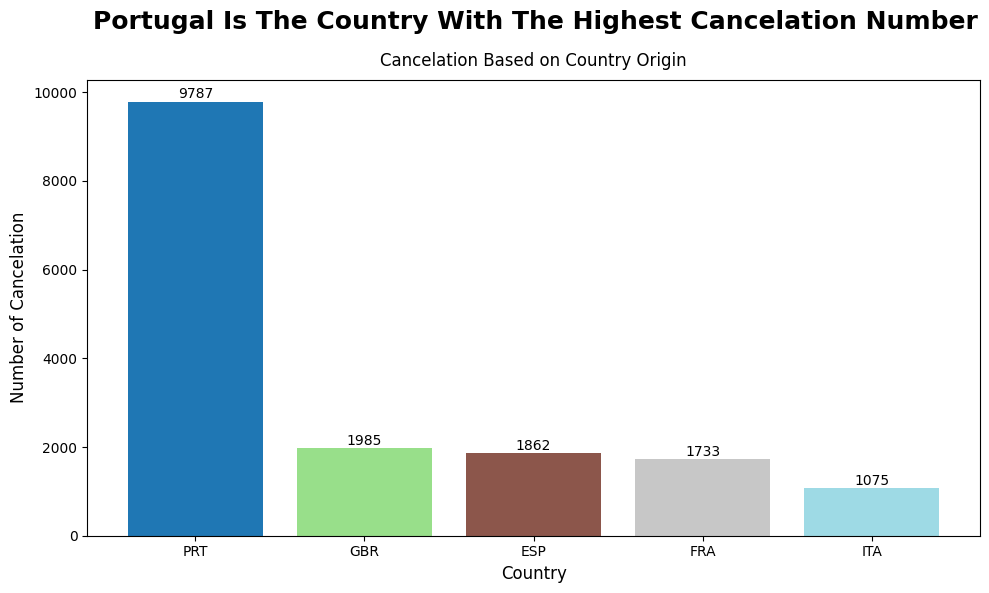

In [84]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_5_country)))
bars = plt.bar(top_5_country.index, top_5_country.values, color=colors)

plt.title('Cancelation Based on Country Origin', fontsize=12, pad=10, loc='center')
plt.suptitle('Portugal Is The Country With The Highest Cancelation Number', fontsize=18, y=0.98, x= 0.54, weight= 'bold')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Cancelation', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

**Note:**

- Despite being the country with the most hotel customers, Portugal also has the most cancelation.
- This means that the more customers there are, the more the number of people who will cancel. And also the more customers, the more revenue the hotel will get, but the risk of losing revenue is also high.

In [85]:
from scipy.stats import chi2_contingency

hotel_rate = pd.crosstab(df['is_canceled'], df['country'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between country and cancellation status. In other words, country does have an effect on the likelihood of canceling a reservation.

#### **ADR / Price**

C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\1211974496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelled_df_adr = cancelled_data.groupby('arrival_date_month')[['adr']].median()
C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\1211974496.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_cancelled_df_adr = not_cancelled_data.groupby('arrival_date_month')[['adr']].median()


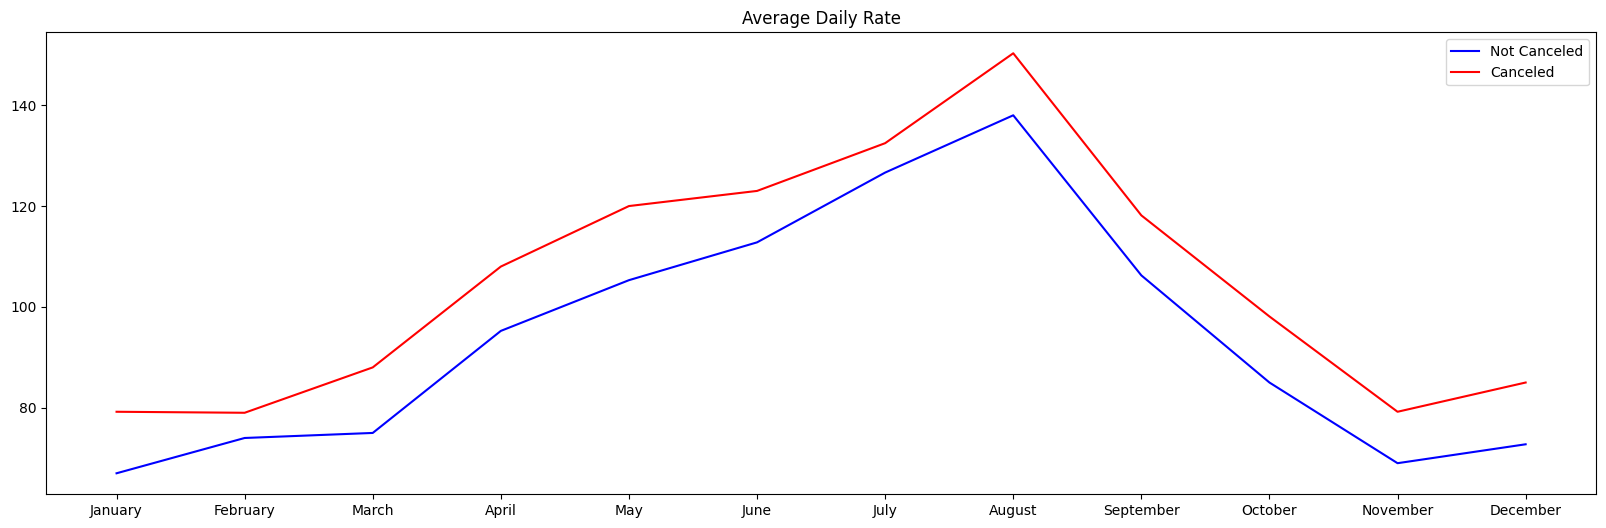

In [86]:
cancelled_df_adr = cancelled_data.groupby('arrival_date_month')[['adr']].median()
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

not_cancelled_data = df[df['is_canceled']=='Not Canceled']
not_cancelled_df_adr = not_cancelled_data.groupby('arrival_date_month')[['adr']].median()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['arrival_date_month'], not_cancelled_df_adr['adr'], label= 'Not Canceled', color= 'blue') 
plt.plot(cancelled_df_adr['arrival_date_month'], cancelled_df_adr['adr'], label= 'Canceled', color='red')
plt.legend()

**Note:**<br>
The average daily price throughout the year for canceled orders is higher than for non-canceled bookings. This shows that price is not the main reason for customers to cancel orders.

In [87]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df[df['is_canceled'] == 'Not Canceled']['adr'],
    y=df[df['is_canceled'] == 'Canceled']['adr'],
    alternative='two-sided')

print(f"P-value: {pvalue:.2f}")

P-value: 0.00


**Note:**<br>
Based on the Mann-Whitney U test results with a P-value of 0.00, it can be concluded that there is a statistically significant difference between ADR (Average Daily Rate) for canceled and non-canceled bookings.

#### **Deposit Type**

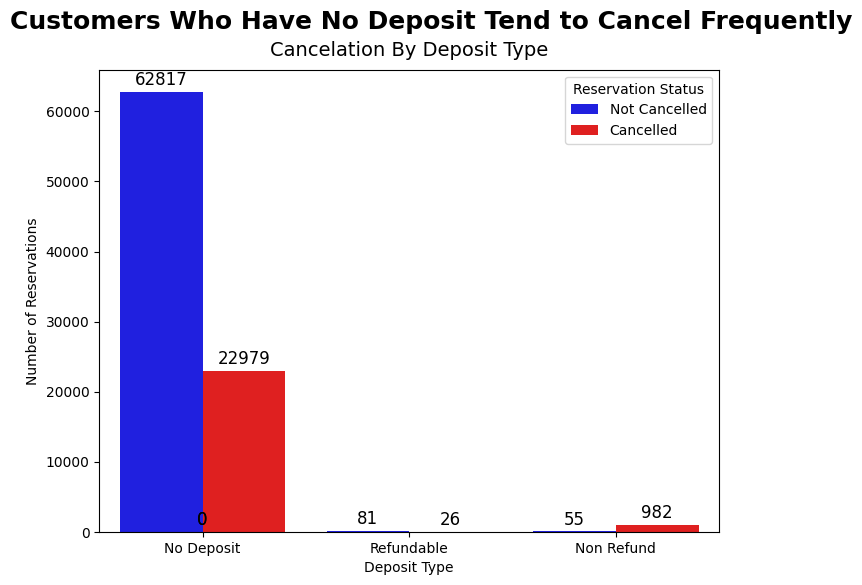

In [88]:
plt.figure(figsize=(8, 6))

palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

ax1 = sns.countplot(x='deposit_type', hue='is_canceled', data=df, palette=palette)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),
                 textcoords='offset points')


plt.title('Cancelation By Deposit Type', fontsize=14, pad=10, loc='center')
plt.suptitle('Customers Who Have No Deposit Tend to Cancel Frequently', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Reservations')

plt.show()

**Note:**

- Customers with Deposit Type 'No Deposit' chose the highest number of cancelations with 22979 cancelations. This is also because there are no costs borne by customers when canceling the booking.
- But if we look at the 'non-refundable' deposit types, the number of cancelations is higher than the non-canceled ones. Let's see the cancellation rate.

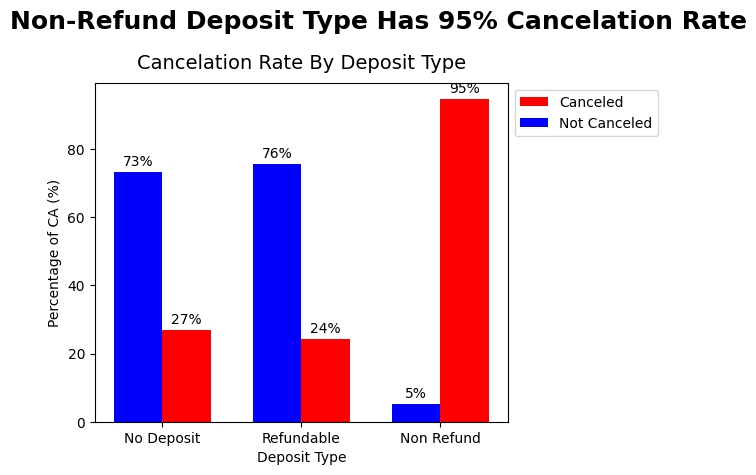

In [89]:
cancel_counts = df.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)

new_order = ['No Deposit','Refundable', 'Non Refund']
cancel_counts = cancel_counts.loc[new_order]

total_counts = cancel_counts.sum(axis=1)
cancelled_percent = (cancel_counts['Canceled'] / total_counts) * 100
not_cancelled_percent = (cancel_counts['Not Canceled'] / total_counts) * 100

bar_width = 0.35
index = range(len(cancel_counts.index))

fig, ax = plt.subplots()
bar2 = ax.bar([i + bar_width for i in index], cancelled_percent, bar_width, label='Canceled', color='red')
bar1 = ax.bar(index, not_cancelled_percent, bar_width, label='Not Canceled', color='blue')

ax.set_xlabel('Deposit Type')
ax.set_ylabel('Percentage of CA (%)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cancel_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')

plt.title('Cancelation Rate By Deposit Type', fontsize=14, pad=10, loc='center')
plt.suptitle('Non-Refund Deposit Type Has 95% Cancelation Rate', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.tight_layout()
plt.show()

**Note:**

- Non Refund Deposit Type has a very high cancellation rate of 95%. However, even though the cancellation rate is the highest, this will not affect the revenue of the hotel because customers with this type of deposit have paid the bill in advance and do not get a refund if they cancel, so the hotel still gets revenue from this type of customer.
- What we need to be aware of is precisely from customers with No Deposit and Refundable.

In [90]:
hotel_rate = pd.crosstab(df['is_canceled'], df['deposit_type'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between deposit type and cancellation status. In other words, deposit type does have an effect on the likelihood of canceling a reservation.

#### **Market Segment**

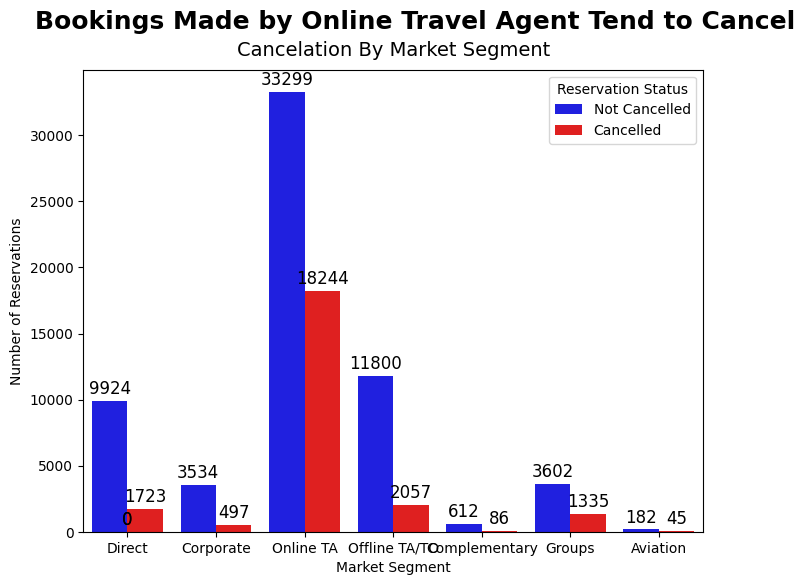

In [91]:
plt.figure(figsize=(8, 6))

palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

ax1 = sns.countplot(x='market_segment', hue='is_canceled', data=df, palette=palette)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Cancelation By Market Segment', fontsize=14, pad=10, loc='center')
plt.suptitle('Bookings Made by Online Travel Agent Tend to Cancel', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Reservations')

plt.show()

**Note**<br>
The easier it is to book, the easier it is to cancel. Online TA had the highest number of cancelations with 18244 cancellations despite this segment accounting for the most customers.

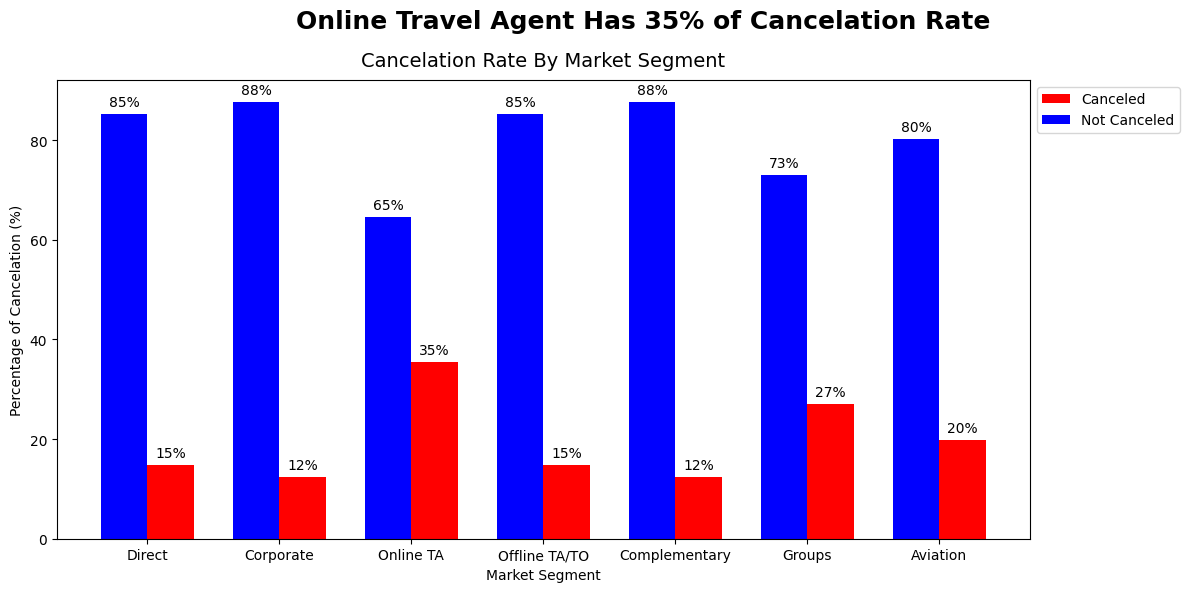

In [92]:
cancel_counts = df.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)

new_order = ['Direct','Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Aviation']
cancel_counts = cancel_counts.loc[new_order]

total_counts = cancel_counts.sum(axis=1)
cancelled_percent = (cancel_counts['Canceled'] / total_counts) * 100
not_cancelled_percent = (cancel_counts['Not Canceled'] / total_counts) * 100

bar_width = 0.35
index = range(len(cancel_counts.index))

fig, ax = plt.subplots(figsize=(12,6))
bar2 = ax.bar([i + bar_width for i in index], cancelled_percent, bar_width, label='Canceled', color='red')
bar1 = ax.bar(index, not_cancelled_percent, bar_width, label='Not Canceled', color='blue')

ax.set_xlabel('Market Segment')
ax.set_ylabel('Percentage of Cancelation (%)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cancel_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')


plt.title('Cancelation Rate By Market Segment', fontsize=14, pad=10, loc='center')
plt.suptitle('Online Travel Agent Has 35% of Cancelation Rate', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.tight_layout()
plt.show()

**Note:**<br>
Although Online TA is the customer's choice for making hotel reservations, it is also the segment that has the most cancellations.

In [93]:
hotel_rate = pd.crosstab(df['is_canceled'], df['market_segment'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between market segment and cancellation status. In other words, market segment does have an effect on the likelihood of canceling a reservation.

#### **Favourite Room Type**

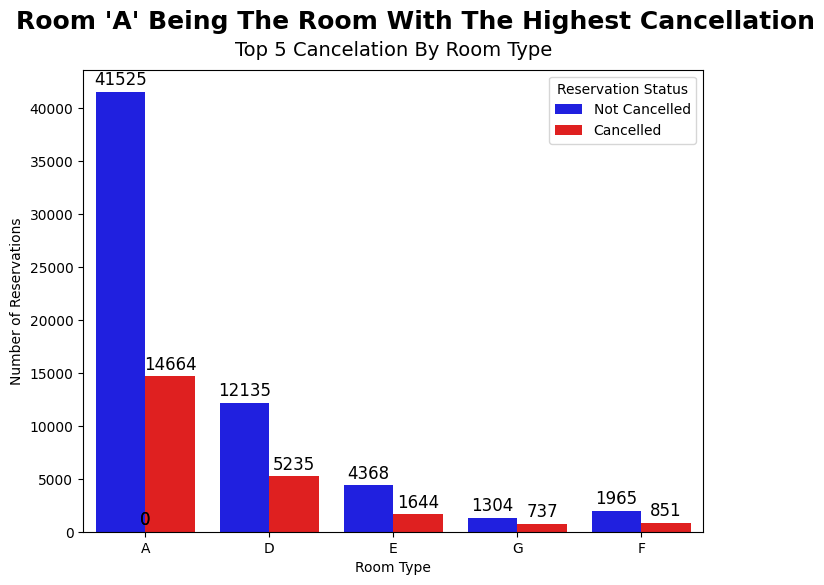

In [94]:
top_reserved_room_types = df['reserved_room_type'].value_counts().nlargest(5).index

df_filtered = df[df['reserved_room_type'].isin(top_reserved_room_types)]

plt.figure(figsize=(8, 6))

palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

ax1 = sns.countplot(x='reserved_room_type', hue='is_canceled', data=df_filtered, palette=palette)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Top 5 Cancelation By Room Type', fontsize=14, pad=10, loc='center')
plt.suptitle("Room 'A' Being The Room With The Highest Cancellation", fontsize=18, y=0.98, x= 0.54, weight='bold')
plt.xlabel('Room Type')
plt.ylabel('Number of Reservations')

plt.show()

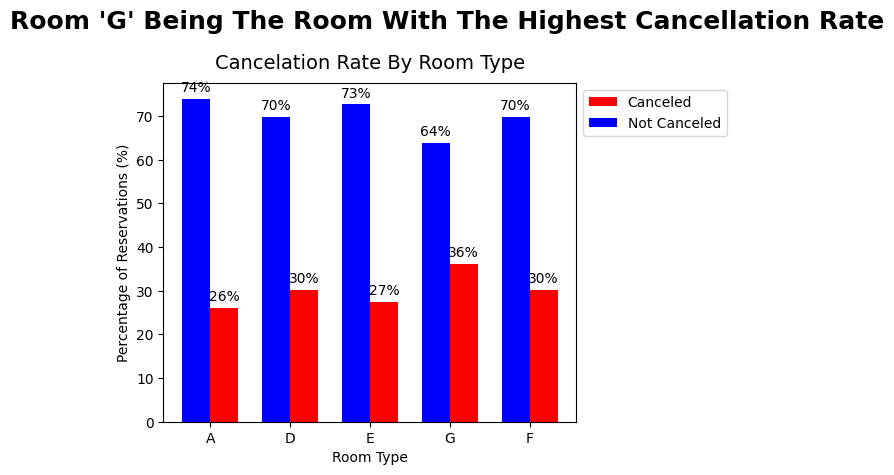

In [95]:
cancel_counts = df.groupby(['reserved_room_type', 'is_canceled']).size().unstack(fill_value=0)

new_order = ['A','D', 'E','G','F']
cancel_counts = cancel_counts.loc[new_order]

total_counts = cancel_counts.sum(axis=1)
cancelled_percent = (cancel_counts['Canceled'] / total_counts) * 100
not_cancelled_percent = (cancel_counts['Not Canceled'] / total_counts) * 100

bar_width = 0.35
index = range(len(cancel_counts.index))

fig, ax = plt.subplots()
bar2 = ax.bar([i + bar_width for i in index], cancelled_percent, bar_width, label='Canceled', color='red')
bar1 = ax.bar(index, not_cancelled_percent, bar_width, label='Not Canceled', color='blue')

ax.set_xlabel('Room Type')
ax.set_ylabel('Percentage of Reservations (%)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cancel_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')

plt.title('Cancelation Rate By Room Type', fontsize=14, pad=10, loc='center')
plt.suptitle("Room 'G' Being The Room With The Highest Cancellation Rate", fontsize=18, y=0.98, x= 0.54, weight='bold')
plt.tight_layout()
plt.show()

**Note:**

- Although room A has the highest number of cancellations, in terms of percentage, room G has the highest cancellation rate with 37%. This could be because customers have already booked and only see reviews about room G after booking and they find bad reviews about this room. This certainly causes loss of revenue from this room.

In [96]:
hotel_rate = pd.crosstab(df['is_canceled'], df['reserved_room_type'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between room type and cancellation status. In other words, room type does have an effect on the likelihood of canceling a reservation.

#### **Lead Time**

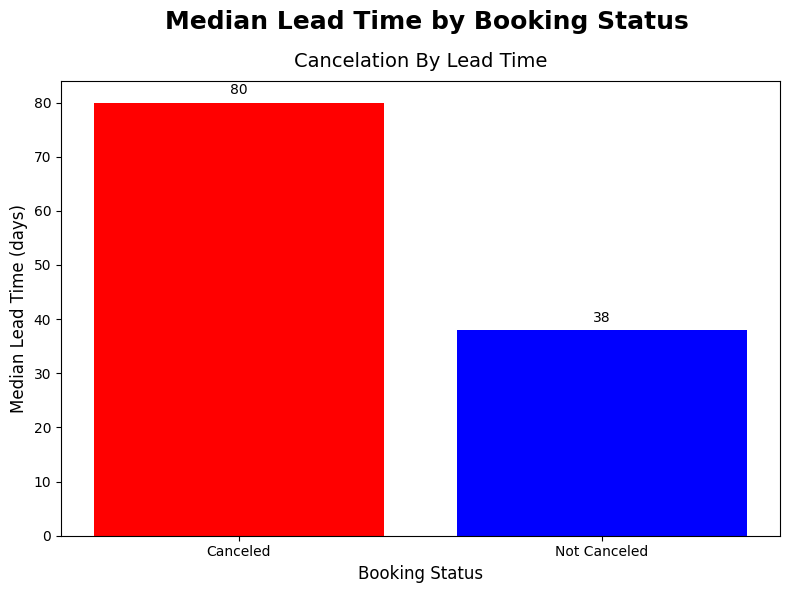

In [97]:
median_lead_time = df.groupby('is_canceled')['lead_time'].median()

median_lead_time.index = ['Canceled','Not Canceled']

plt.figure(figsize=(8, 6))
bars = plt.bar(median_lead_time.index, median_lead_time.values, color=['red', 'blue'])

plt.title('Cancelation By Lead Time', fontsize=14, pad=10, loc='center')
plt.suptitle('Median Lead Time by Booking Status', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Median Lead Time (days)', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Note:**<br>

The median lead time between order and customer arrival of 80 days indicates the booking is at risk of being canceled. This shows that customers who book a hotel well in advance of the arrival date (more than 2 months) are at risk of canceling the booking.

In [98]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df[df['is_canceled'] == 'Not Canceled']['lead_time'],
    y=df[df['is_canceled'] == 'Canceled']['lead_time'],
    alternative='two-sided')

print(f"P-value: {pvalue:.2f}")

P-value: 0.00


**Note:**<br>
Based on the Mann-Whitney U test results with a P-value of 0.00, it can be concluded that there is a statistically significant difference between Lead Time for canceled and non-canceled bookings.

#### **Customer Type**

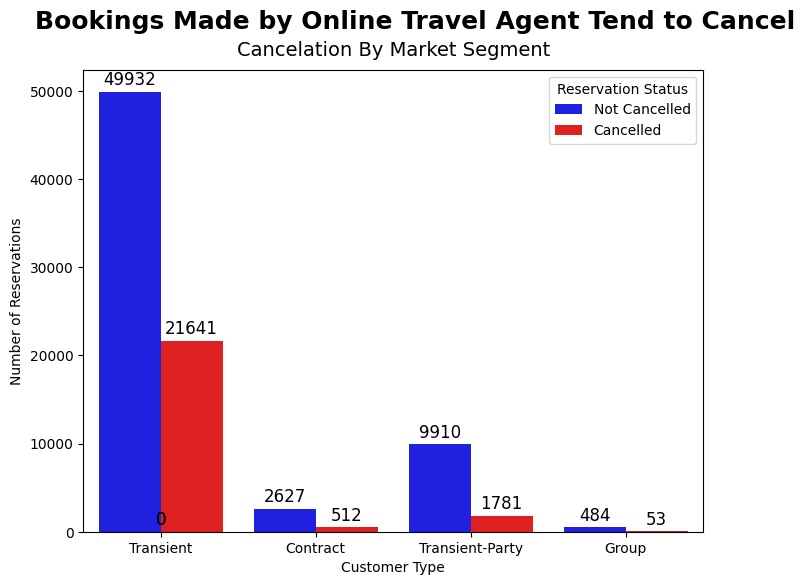

In [99]:
plt.figure(figsize=(8, 6))

palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

ax1 = sns.countplot(x='customer_type', hue='is_canceled', data=df, palette=palette)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Cancelation By Market Segment', fontsize=14, pad=10, loc='center')
plt.suptitle('Bookings Made by Online Travel Agent Tend to Cancel', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Number of Reservations')

plt.show()

**Note:**

Transient customers have the highest cancellation number with 21641 cancelation, even though it also has the most customer.

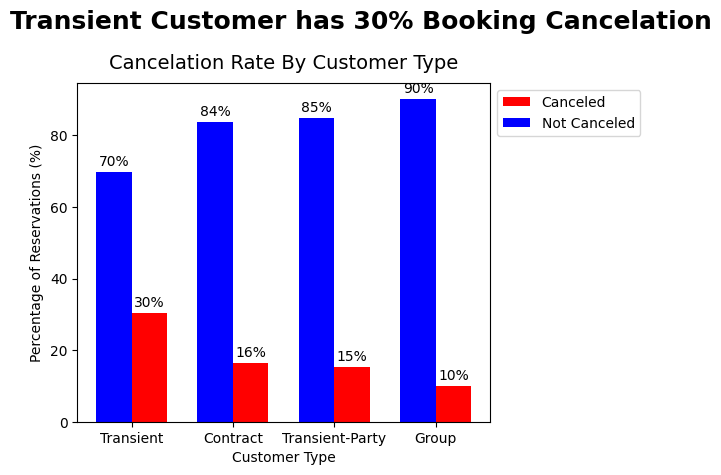

In [100]:
# Menghitung jumlah cancelled dan not cancelled untuk setiap kategori hotel
cancel_counts = df.groupby(['customer_type', 'is_canceled']).size().unstack(fill_value=0)

# Mengubah urutan hotel
new_order = ['Transient','Contract', 'Transient-Party','Group']
cancel_counts = cancel_counts.loc[new_order]

# Menghitung persentase
total_counts = cancel_counts.sum(axis=1)
cancelled_percent = (cancel_counts['Canceled'] / total_counts) * 100
not_cancelled_percent = (cancel_counts['Not Canceled'] / total_counts) * 100

# Plotting
bar_width = 0.35
index = range(len(cancel_counts.index))

fig, ax = plt.subplots()
bar2 = ax.bar([i + bar_width for i in index], cancelled_percent, bar_width, label='Canceled', color='red')
bar1 = ax.bar(index, not_cancelled_percent, bar_width, label='Not Canceled', color='blue')

# Menambahkan label dan judul
ax.set_xlabel('Customer Type')
ax.set_ylabel('Percentage of Reservations (%)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cancel_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Menggeser legend ke kanan

# Menambahkan nilai persentase di atas setiap batang
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}%', va='bottom', ha='center')


plt.title('Cancelation Rate By Customer Type', fontsize=14, pad=10, loc='center')
plt.suptitle('Transient Customer has 30% Booking Cancelation', fontsize=18, y=0.98, x= 0.54, weight = 'bold')
plt.tight_layout()
plt.show()

In [101]:
hotel_rate = pd.crosstab(df['is_canceled'], df['customer_type'])
chi2, p, dof, expected = chi2_contingency(hotel_rate)

print(f"P-value: {p:.4f}")

P-value: 0.0000


**Note:**<br>
From the Chi-Squared Test, a P-value of 0.000 was obtained. This means that there is a statistically significant relationship between customer type and cancellation status. In other words, customer type does have an effect on the likelihood of canceling a reservation.

## **Conclusion and Recomendation**

### **Conclusion**

1. From the analysis that has been done, we can make the following conclusions about Hotel Booking Demand:
    * Out of 86940 bookings, 53033 or 61% customers choose City Hotel for their stay rather than Resort Hotel.
    * 27449 customers came from Portugal, making it the country with the most customer.
    * 69028 bookings were booked through Travel Agents/Tour Operator, proving that customers prefer third parties to book hotels despite administration fees.
    * The number of bookings increases from February when spring starts to peak in August during summer. After entering fall, the number of bookings decreases to peak in January during winter. Customers naturally do not want to travel when the temperature is low.
    * The average hotel price per day for Resort Hotel shows a rapid increase from April to August and is higher compared to City Hotel as more customers want to take a vacation. While the increase for City Hotel is seen to rise in April and stabilize in May to August.

2. Characteristics of customers who cancel the booking:
    * Out of 86940 bookings, 24343 or 28% bookings were canceled. 
    * City hotel has the most customers, but the cancelation rate is also high at 30%.
    * Portugal, despite having the most customers, also had the highest cancelation rate.
    * The average price of hotels per day whose orders were canceled was higher than those that were not canceled. This shows that the higher the price of the hotel, the more likely it is to be canceled.
    * In terms of deposit type, customers who made bookings with No Deposit canceled the most. Although in terms of cancelation rate the highest is the customer with Non Refund deposit, but this customer if canceling the order does not have a loss effect on the hotel.
    * Market segment Online TA has the highest cancelation rate with 35% cancelation. Shows that the easier the booking, the more likely it is to be canceled.
    * Although Room 'A' has a high number of cancellations, it is Room 'G' that has the highest cancelation rate with 36% of cancelation. Because Room Type is exposed to cancelation, it is possible that customers have chosen Room G and afterwards see bad reviews about this room, so they prefer to cancel the order.
    * Customers with a long lead time (around 80 days) are more likely to cancel than customers who have booked 36 days before arrival. This shows that customers who book a hotel well in advance of the arrival date are at risk of canceling the booking.
    * Transient customers are the most common type of customers. despite having the highest number of cancellations. even the cancelation rate is also the highest with 30% of cancellations. 

### **Recommendation**

Based on the analysis provided, here are some recommendations and actionable plans to reduce hotel cancellation rates and minimize revenue loss:

1. **Enhance Quality and Transparency of Information**
    * **Customer Reviews and Ratings**: Ensure that customer reviews and ratings are easily accessible on the hotel’s website and booking platforms. Focus on improving the quality of service in rooms with high cancellation rates (e.g., Room 'G') and respond constructively to negative feedback to enhance the hotel's reputation.
    * **Detailed Room and Facility Descriptions**: Provide clear and comprehensive descriptions of each room type, including high-quality photos and a complete list of amenities. This helps prospective guests make more informed decisions, thereby reducing cancellations due to dissatisfaction.

2. **Pricing and Promotional Strategies**
    * **Early Booking Specials**: Offer discounts or special packages for bookings made well in advance (over 80 days). This can attract customers who plan their trips meticulously and are less likely to cancel.
    * **Flexible Pricing Policies**: Implement flexible pricing policies, such as discounts for non-cancellable bookings or lower penalties for early cancellations. This can decrease the cancellation rate among guests with uncertain travel plans.

3. **Optimize Sales Channels**
    * **Direct Marketing**: Develop a direct marketing strategy to reduce reliance on online travel agents, which have higher cancellation rates. Utilize email marketing and loyalty programs to attract and retain loyal customers.
    * **Collaboration with Travel Agents/Tour Operators**: Reevaluate and renegotiate contracts with online travel agents, offering incentives to promote longer booking windows and higher deposits.

4. **Enhance Customer Experience**
    * **Proactive Customer Service**: Train staff to promptly contact guests who have booked to confirm details and provide additional information that may enhance their satisfaction.
    * **Value-Added Offers**: Provide value-added offers such as free shuttle services, complimentary breakfasts, or special room upgrades for confirmed bookings. This can increase the attractiveness of staying and reduce the likelihood of cancellations.
    
5. **Data Analysis and Monitoring**
    * **Cancellation Cause Analysis**: Continuously monitor and analyze cancellation data to identify patterns and primary causes of cancellations. Use this data to adjust marketing, pricing, and service strategies accordingly.
    * **Predictive Analytics and Early Warning**: Develop predictive models to identify potentially cancellable bookings based on customer behavior and historical data. This can help in taking preventive measures, such as reaching out to the customer or offering incentives to secure the booking.

By implementing these measures, the hotel can reduce its cancellation rates, boost revenue, and provide a better overall experience for guests.

<center><h3>
<b>Thank You!</b>
    </h3>
    </center>
<hr>

In [102]:
df.replace(to_replace=['Not Canceled', 'Canceled'], value=[0, 1], inplace=True)
df.replace(to_replace=['Not Repeated', 'Repeated'], value=[0, 1], inplace=True)

C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\1228747987.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Not Canceled', 'Canceled'], value=[0, 1], inplace=True)
C:\Users\Garudapaksi\AppData\Local\Temp\ipykernel_12792\1228747987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Not Repeated', 'Repeated'], value=[0, 1], inplace=True)


In [103]:
df.to_csv(path_or_buf='hotel_bookings_cleaned.csv', index=False)

In [104]:
# Outputting version info for libraries in this notebook
import session_info
session_info.show(write_req_file=True, req_file_name='Hotel_Booking_Demand_Part_1_requirements.txt')